In [ ]:
#https://www.kaggle.com/jesucristo/imet2020-visualization/data

In [2]:
import numpy as np 
import pandas as pd 
import os
import glob
import json
from matplotlib import pyplot as plt
import seaborn as sns
from collections import Counter
import gc
from PIL import Image

%matplotlib inline

In [3]:
os.getcwd()

'C:\\Users\\Meehir\\Documents\\GitHub\\project-5'

In [4]:
kaggle_20_path = "D:\\METIS\\kaggle\\imet-2020-fgvc7\\"
kaggle_19_path = "D:\\METIS\\kaggle\\imet-2019-fgvc6\\"

In [5]:
train_df = pd.read_csv(kaggle_20_path + 'train.csv')
test_df = pd.read_csv(kaggle_20_path + 'sample_submission.csv')
labels_df = pd.read_csv(kaggle_20_path + 'labels.csv')

In [6]:
print("Train", train_df.shape)
train_df.sample(10).head()

Train (142119, 2)


,id,attribute_ids
42720,4cefb48617b2d65ffd73bbd5524655c5,3136 2987 2018 782
118067,d508a81df50ee6fa961111ed8e9291d6,2931 256 2150 782 10
111995,ca0a6c77d6c624252a4dd2cd07070c37,3418 3078 3123 782
52953,5f39af28e5c3e80a673a30b678585607,3465 1301
98721,b1f50582da5de8c8c84b6ff4b8d451ee,2997 2732 679 2670 1727 782


In [7]:
print("Test", test_df.shape)
test_df.sample(10).head()

Test (25958, 2)


,id,attribute_ids
6183,3d79de077b88eabfee98a8ac60a14c29,0 1 2
14455,8f388bf27c757e0431a0200657ff6ac6,0 1 2
3975,277f24cf917e52958a4a661acc2bf34b,0 1 2
23142,e4a4e442a84d5adbc2d8f7f179215c65,0 1 2
4284,2ac0dffad35c34d8c68d99f75a7778ff,0 1 2


In [8]:
labels_df.sample(10).head(10)

,attribute_id,attribute_name
125,125,culture::american or british
3258,3258,tags::police
2372,2372,medium::silver gilt
2353,2353,medium::silk; lampas
2435,2435,medium::stippled
993,993,medium::brush and gray-brown wash
1969,1969,medium::papyrus with ink
711,711,culture::teotihuacan
2444,2444,medium::stones
500,500,culture::merovingian


medium       1920
tags          768
culture       681
country       100
dimension       5
Name: attribute_type, dtype: int64


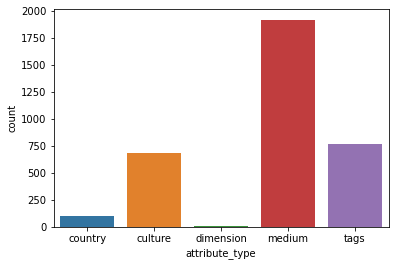

In [9]:
labels_df["attribute_type"] = labels_df.attribute_name.apply(lambda x: x.split("::")[0])
print(labels_df["attribute_type"].value_counts())
sns.countplot(x = labels_df.attribute_type);

In [10]:
labels_df.attribute_id.nunique()

3474

In [11]:
1920 + 768 + 681 + 100 + 5 # number of attributes = N_CLASSES

3474

In [12]:
labels_df.attribute_type.unique()

array(['country', 'culture', 'dimension', 'medium', 'tags'], dtype=object)

In [13]:
labels_df[labels_df.attribute_type == "tags"]

,attribute_id,attribute_name,attribute_type
2706,2706,tags::abbeys,tags
2707,2707,tags::abraham,tags
2708,2708,tags::abstraction,tags
2709,2709,tags::acanthus,tags
2710,2710,tags::achilles,tags
...,...,...,...
3469,3469,tags::writing,tags
3470,3470,tags::writing implements,tags
3471,3471,tags::zebras,tags
3472,3472,tags::zeus,tags


In [37]:
df = labels_df[labels_df.attribute_type == "tags"].copy()
df.set_index('attribute_id', inplace=True)
df.head()

,attribute_name,attribute_type
attribute_id,,
2706,tags::abbeys,tags
2707,tags::abraham,tags
2708,tags::abstraction,tags
2709,tags::acanthus,tags
2710,tags::achilles,tags


In [38]:
df['attr_name'] = [x.split('::')[1] for x in df['attribute_name']]
df.drop(columns=['attribute_name', 'attribute_type'], inplace=True)
df.rename(columns = {'attr_name': 'attribute_name'}, inplace=True)
df.head()

,attribute_name
attribute_id,
2706,abbeys
2707,abraham
2708,abstraction
2709,acanthus
2710,achilles


In [39]:
df.attribute_name.value_counts()

infants        1
party          1
saint mark     1
shiva          1
lambs          1
              ..
earrings       1
medea          1
crucifixion    1
bathing        1
tigers         1
Name: attribute_name, Length: 768, dtype: int64

In [14]:
train_attr_ohot = np.zeros((len(train_df), len(labels_df)), dtype=int)

for idx, attr_arr in enumerate(train_df.attribute_ids.str.split(" ").apply(lambda l: list(map(int, l))).values):
    train_attr_ohot[idx, attr_arr] = 1
    
names_arr = labels_df.attribute_name.values
train_df["attribute_names"] = [", ".join(names_arr[arr == 1]) for arr in train_attr_ohot]

train_df["attr_num"] = train_attr_ohot.sum(axis=1)
train_df["culture_attr_num"] = train_attr_ohot[:, :398].sum(axis=1)
train_df["tag_attr_num"] = train_attr_ohot[:, 398:].sum(axis=1)

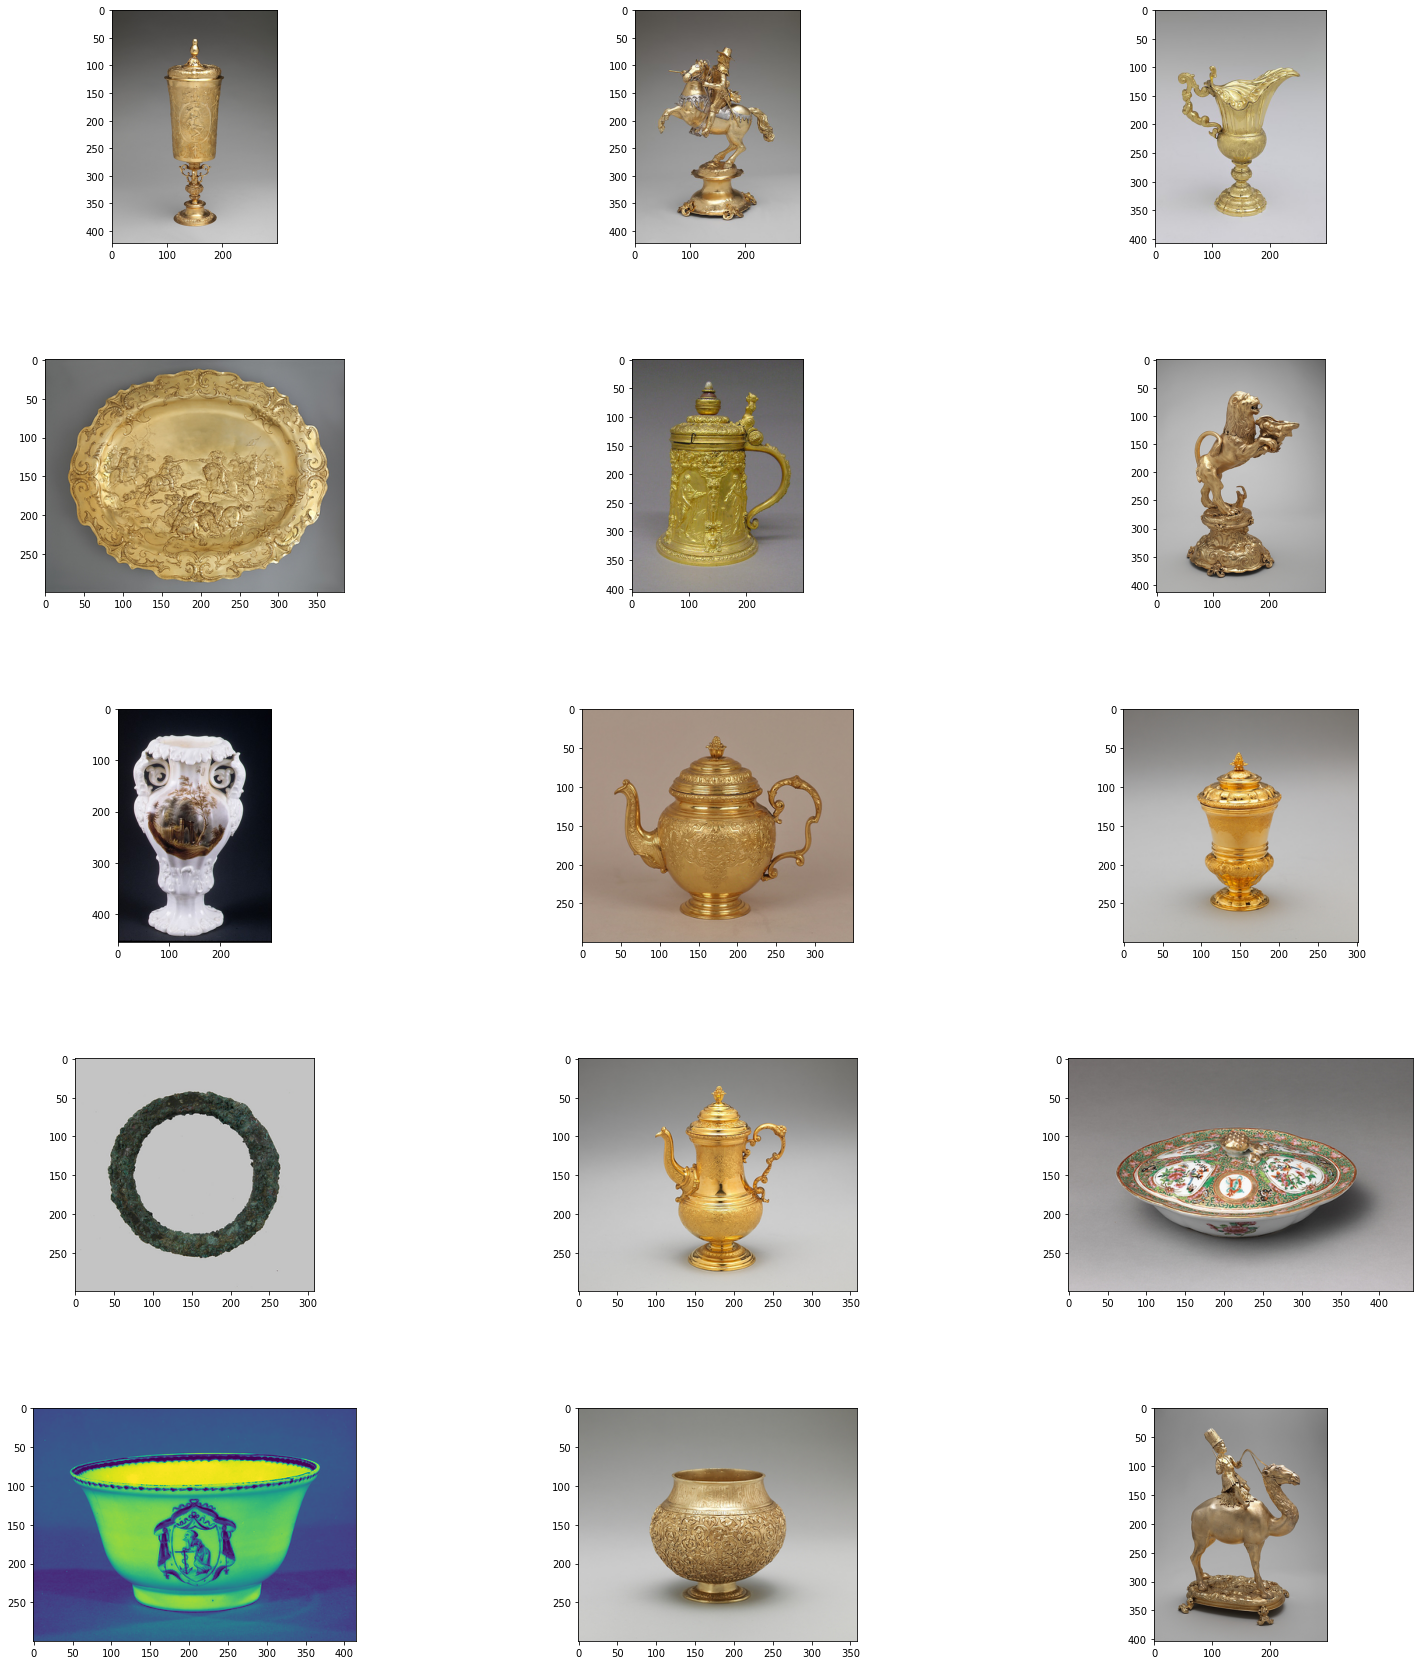

In [15]:
# https://www.kaggle.com/ttahara/eda-compare-number-of-culture-and-tag-attributes
fig = plt.figure(figsize=(5 * 5, 5 * 6))
fig.subplots_adjust(wspace=0.5, hspace=0.5)
for i, (art_id, attr_names) in enumerate(train_df.sort_values(by="culture_attr_num", ascending=False)[["id", "attribute_names"]].values[:15]):
    ax = fig.add_subplot(5, 3, i // 3 * 3 + i % 3 + 1)
    im = Image.open(kaggle_20_path + "train\\{}.png".format(art_id))
    ax.imshow(im)
    im.close()
    attr_split = attr_names.split(", ")
    attr_culture = list(map(lambda x: x.split("::")[-1], filter(lambda x: x[:7] == "culture", attr_split)))
    attr_tag = list(map(lambda x: x.split("::")[-1], filter(lambda x: x[:3] == "tag", attr_split)))

In [16]:
train20 = pd.read_csv(kaggle_20_path + "train.csv")
test20 = pd.read_csv(kaggle_20_path + "sample_submission.csv")
labels20 = pd.read_csv(kaggle_20_path +"labels.csv")

train19 = pd.read_csv(kaggle_19_path + "train.csv")
test19 = pd.read_csv(kaggle_19_path + "sample_submission.csv")
labels19 = pd.read_csv(kaggle_19_path + "labels.csv")

In [17]:
train20.shape, train19.shape

((142119, 2), (109237, 2))

In [18]:
np.intersect1d(train20.id.values , train19.id.values)

array([], dtype=object)

In [19]:
train19.head()

,id,attribute_ids
0,1000483014d91860,147 616 813
1,1000fe2e667721fe,51 616 734 813
2,1001614cb89646ee,776
3,10041eb49b297c08,51 671 698 813 1092
4,100501c227f8beea,13 404 492 903 1093


In [20]:
labels19.head()

,attribute_id,attribute_name
0,0,culture::abruzzi
1,1,culture::achaemenid
2,2,culture::aegean
3,3,culture::afghan
4,4,culture::after british


tag        705
culture    398
Name: attribute_type, dtype: int64


<AxesSubplot:xlabel='attribute_type', ylabel='count'>

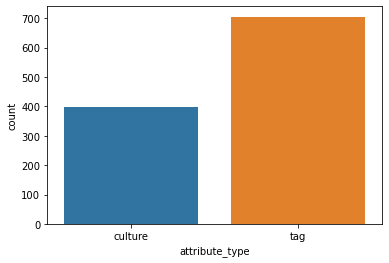

In [21]:
labels19["attribute_type"] = labels19.attribute_name.apply(lambda x: x.split("::")[0])
print(labels19["attribute_type"].value_counts())
sns.countplot(x = labels19.attribute_type)

In [22]:
print (labels20.attribute_name.nunique())
print (labels19.attribute_name.nunique())
print (np.intersect1d(labels20.attribute_name.values , 
                      labels19.attribute_name.values).shape)

3474
1103
(362,)
